# 1 数学基础
author：SheltonXiao

## 1.1 绘制函数图像

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
from tqdm import trange

In [9]:
def plotpic_save(a,b):
    x1 = np.arange(-5,5,0.01)[np.newaxis,:]
    x2 = np.arange(-5,5,0.01)[:,np.newaxis]
    z = (a-x1)**2+b*(x2-x1**2)**2
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1,x2,z,cmap='rainbow',alpha=0.7)
    
    plt.savefig("pic/"+str(a)+"_"+str(b)+".png")
    plt.close()

In [11]:
A = np.arange(-1000,1000,100)
B = np.arange(-1000,1000,100)
i,j = np.meshgrid(A,B)
i = i.flatten()
j = j.flatten()
for u in trange(len(i)):
    plotpic_save(i[u],j[u])

100%|██████████| 400/400 [02:13<00:00,  3.01it/s]


## 1.2 求最优解

In [53]:
def plotpic(a,b,W):
    x1 = np.arange(-5,5,0.01)[np.newaxis,:]
    x2 = np.arange(-5,5,0.01)[:,np.newaxis]
    z = (a-x1)**2+b*(x2-x1**2)**2
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1,x2,z,cmap='rainbow',alpha=0.7)
    
    Z = (a-W[0])**2+b*(W[1]-W[0]**2)**2
    ax.plot3d(W[0],W[1],Z,"-o")

In [44]:
a = 1
b = 100

In [13]:
def rosenbrock(x):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

常用的函数

In [18]:
def diff(f, x, delta=1e-4):
    out = []
    out.append((f([x[0]+delta,x[1]]) - f([x[0]-delta,x[1]])) / (2 * delta))
    out.append((f([x[0],x[1]+delta]) - f([x[0],x[1]-delta])) / (2 * delta))
    return out

In [49]:
x = [1,5]
diff(rosenbrock,x)

[-1599.999995997905, 799.9999999981355]

直接写出导数

In [23]:
def jacobian(x):
    return np.array([-4*b*x[0]*(x[1]-x[0]**2)-2*(a-x[0]),2*b*(x[1]-x[0]**2)])

In [46]:
jacobian(x)

array([0, 0])

### 1.2.1 最速下降法

先定义搜索函数，根据goldstein准则

In [26]:
import random
 
def goldsteinsearch(f,df,d,x,alpham,rho,t): 
    flag=0
 
    a=0
    b=alpham
    fk=f(x)
    gk=df(x)
 
    phi0=fk
    dphi0=np.dot(gk,d)
 
    alpha=b*random.uniform(0,1)
 
    while(flag==0):
        newfk=f(x+alpha*d)
        phi=newfk
        if(phi-phi0<=rho*alpha*dphi0):
            if(phi-phi0>=(1-rho)*alpha*dphi0):
                flag=1
            else:
                a=alpha
                b=b
                if(b<alpham):
                    alpha=(a+b)/2
                else:
                    alpha=t*alpha
        else:
            a=a
            b=alpha
            alpha=(a+b)/2
    return alpha

主函数

In [29]:
def steepest(x0): 
    imax = 20000
    W=np.zeros((2,imax))
    W[:,0] = x0
    x = x0
    grad = jacobian(x)
    delta = sum(grad**2) # initial error
 
 
    for i in trange(1,imax):
        p = -jacobian(x)
        x0=x
        alpha = goldsteinsearch(rosenbrock,jacobian,p,x,1,0.1,2)
        x = x + alpha*p
        W[:,i] = x
        grad = jacobian(x)
        delta = sum(grad**2)
        if delta<=10**(-5):
            break
 

    W=W[:,0:i+1] # 记录迭代点
    return W

In [50]:
W = steepest(x)

 16%|█▌        | 3148/19999 [00:00<00:00, 19499.49it/s]


In [51]:
W[:,-1]

array([1.0033618 , 1.00675035])

AttributeError: 'Axes3DSubplot' object has no attribute 'plot3d'

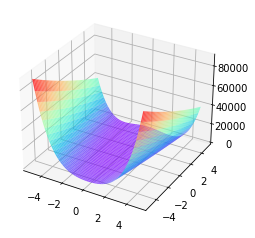

In [55]:
plotpic(a,b,W)